In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
import seaborn as sns
import cv2
import scipy.stats as ss
%matplotlib inline

In [72]:
mat1 = np.array([[1, 1, 2], [2, 7, 1]])
mat2 = np.array([[1, 2, 2], [2, 7, 2]])
x = np.random.normal(2, 1, 100)
y = np.random.normal(1, 1, 100)

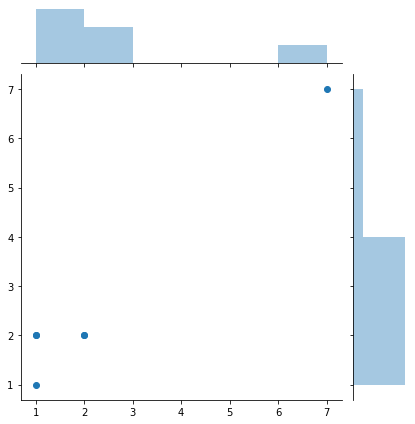

In [4]:
sns.jointplot(mat1, mat2, kind='scatter')

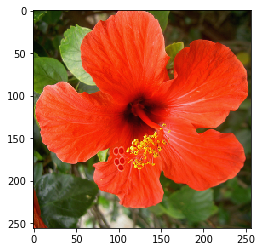

In [5]:
img = cv2.imread('./section8-image.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
b, g, r = cv2.split(img)

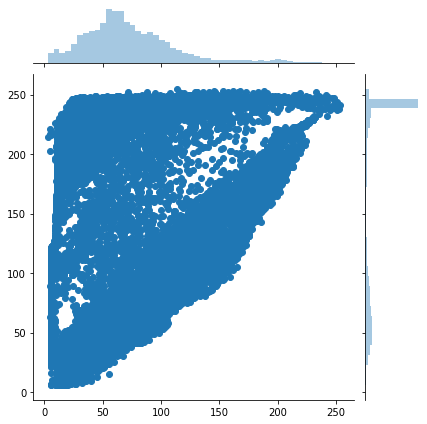

In [8]:
sns.jointplot(x=g, y=r, kind='scatter')

In [9]:
die = np.arange(1, 7)
die2 = np.array([1, 2, 3, 1, 5, 6,7,8,9])
coin = np.arange(1, 3)
coin2 = np.array([1,1])

In [73]:
def jointTable(x, y):
    ones = np.ones((len(x)+1, len(y)+1))
    unique, counts = np.unique(x, return_counts=True)
    xdic = dict(zip(unique, counts))
    unique, counts = np.unique(y, return_counts=True)
    ydic = dict(zip(unique, counts))
    
    for i in range(len(x)+1):
        for j in range(len(y)+1):
            if (i+1 in xdic.keys() and j+1 in ydic.keys()):
                ones[j][i] = (xdic[i+1]/len(x)) * (ydic[i+1]/len(y))
            else:
                ones[j][i] = 0
    df = pd.DataFrame(ones)
    df['Marginal'] = df.sum(axis=1)
    df = df.T
    df['Marginal'] = df.sum(axis=1)
    df = df.T
    return df

In [75]:
df = jointTable([1,1,2,3,4,5,7,7], [1,1,2,3,4,5,7,1])
df

,0,1,2,3,4,5,6,7,8,Marginal
0,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
1,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
2,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
3,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
4,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0000
6,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0000
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0000
Marginal,0.56250,0.093750,0.093750,0.093750,0.093750,0.0,0.18750,0.0,0.0,1.1250


In [76]:
x = np.array([[1, 1, 2], [2, 7, 1]]).flatten()
y = np.array([[1, 2, 2], [2, 7, 2]]).flatten()
x = [1,1,2,3,4,5,7,7] 
y = [1,1,2,3,4,5,7,1]
ones = np.ones((len(y)+1, len(x)+1))
unique, counts = np.unique(x, return_counts=True)
xdic = dict(zip(unique, counts))
unique, counts = np.unique(y, return_counts=True)
ydic = dict(zip(unique, counts))

for i in range(len(x)+1):
    for j in range(len(y)+1):
        if (i+1 in xdic.keys() and j+1 in ydic.keys()):
            ones[j][i] = (xdic[i+1]/len(x)) * (ydic[i+1]/len(y))
        else:
            ones[j][i] = 0
ones

array([[0.09375 , 0.015625, 0.015625, 0.015625, 0.015625, 0.      ,
        0.03125 , 0.      , 0.      ],
       [0.09375 , 0.015625, 0.015625, 0.015625, 0.015625, 0.      ,
        0.03125 , 0.      , 0.      ],
       [0.09375 , 0.015625, 0.015625, 0.015625, 0.015625, 0.      ,
        0.03125 , 0.      , 0.      ],
       [0.09375 , 0.015625, 0.015625, 0.015625, 0.015625, 0.      ,
        0.03125 , 0.      , 0.      ],
       [0.09375 , 0.015625, 0.015625, 0.015625, 0.015625, 0.      ,
        0.03125 , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      ],
       [0.09375 , 0.015625, 0.015625, 0.015625, 0.015625, 0.      ,
        0.03125 , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      ]])

In [78]:
df = pd.DataFrame(ones)
df['Marginal'] = df.sum(axis=1)
df = df.T
df['Marginal'] = df.sum(axis=1)
df = df.T

In [79]:
df

,0,1,2,3,4,5,6,7,8,Marginal
0,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
1,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
2,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
3,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
4,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0000
6,0.09375,0.015625,0.015625,0.015625,0.015625,0.0,0.03125,0.0,0.0,0.1875
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0000
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0000
Marginal,0.56250,0.093750,0.093750,0.093750,0.093750,0.0,0.18750,0.0,0.0,1.1250
